In [106]:
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

In [107]:
data = [736, 6.864e-05,
752, 6.7168e-05,
1504, 9.4784e-05,
3040, 0.000103168,
6080, 0.000152832,
12224, 0.000271424,
24448, 0.000380992,
49024, 0.00060096,
98048, 0.0013232,
196352, 0.00216963,
392704, 0.0038768,
785920, 0.00738352,
1571840, 0.0155536,
3143680, 0.0291078,
736, 6.8352e-05,
736, 6.784e-05,
752, 5.8944e-05,
1504, 8.4288e-05,
3040, 9.1648e-05,
6080, 0.000160096,
12224, 0.000239104,
24448, 0.000297088,
49024, 0.000542496,
98048, 0.00106394,
196352, 0.00183542,
392704, 0.00354666,
785920, 0.00722224,
1571840, 0.0134478,
3143680, 0.0253471,
736, 6.7712e-05,
736, 6.7552e-05,
736, 6.7584e-05,
736, 6.128e-05,
736, 6.0416e-05,
752, 9.4656e-05,
1504, 8.48e-05,
3040, 0.00010336,
6080, 0.000191616,
12224, 0.000246208,
24448, 0.00033376,
49024, 0.000532448,
98048, 0.00103139,
196352, 0.00202592,
392704, 0.00451683,
785920, 0.00740934,
1571840, 0.0133914,
3143680, 0.0254371,
736, 5.9264e-05,
736, 5.9456e-05,
736, 5.9264e-05,
736, 5.9072e-05,
736, 5.888e-05,
736, 6.2272e-05,
736, 5.8496e-05,
752, 7.2032e-05,
1504, 8.4832e-05,
3040, 0.000111872,
6080, 0.000177728,
12224, 0.000175648,
24448, 0.000368928,
49024, 0.000541184,
98048, 0.00113834,
196352, 0.00184435,
392704, 0.00367395,
785920, 0.00662861,
1571840, 0.0127583,
3143680, 0.025068,
736, 5.5712e-05,
736, 5.5456e-05,
736, 5.2032e-05,
736, 5.2736e-05,
736, 5.3024e-05,
736, 5.3408e-05,
752, 7.5616e-05,
1504, 8.4e-05,
3040, 8.8352e-05,
6080, 0.000147584,
12224, 0.000205216,
24448, 0.000350688,
49024, 0.000555328,
98048, 0.00120438,
196352, 0.0020039,
392704, 0.00357325,
785920, 0.00668358,
1571840, 0.0130124,
3143680, 0.0253907,
736, 5.936e-05,
736, 5.888e-05,
736, 5.9232e-05,
736, 5.9552e-05,
736, 5.9232e-05,
752, 7.0912e-05,
1504, 8.4832e-05,
3040, 9.7888e-05,
6080, 0.000165344,
12224, 0.000206784,
24448, 0.00034304,
49024, 0.000500928,
98048, 0.00107728,
196352, 0.00186643,
392704, 0.00354701,
785920, 0.00653798,
1571840, 0.0135381,
3143680, 0.0252645,
736, 5.936e-05,
752, 6.9248e-05,
736, 5.408e-05,
752, 6.192e-05,
736, 5.8592e-05,
752, 7.5616e-05,
1504, 8.432e-05,
3040, 0.000106144,
6080, 0.000135616,
12224, 0.000181664,
24448, 0.00046016,
49024, 0.000569152,
98048, 0.00111632,
196352, 0.00196864,
392704, 0.00349238,
785920, 0.00656451,
1571840, 0.0126756,
3143680, 0.0253825,
736, 6.672e-05,
736, 5.184e-05,
736, 5.1488e-05,
752, 6.8832e-05,
736, 5.0848e-05,
752, 6.1216e-05,
1504, 7.7024e-05,
3040, 8.8352e-05,
6080, 0.000136768,
12224, 0.000224288,
24448, 0.000396928,
49024, 0.000596512,
98048, 0.00121693,
196352, 0.00197485,
392704, 0.00352432,
785920, 0.00721386,
1571840, 0.0135582,
3143680, 0.0250971,
736, 5.0976e-05,
736, 5.2608e-05,
736, 6.048e-05,
736, 6.7616e-05,
736, 6.7552e-05,
752, 7.6832e-05,
1504, 8.4224e-05,
3040, 8.784e-05,
6080, 0.000157568,
12224, 0.000188832,
24448, 0.000358784,
49024, 0.000619104,
98048, 0.00106355,
196352, 0.00188096,
392704, 0.0037233,
785920, 0.00651344,
1571840, 0.0135062,
3143680, 0.0249743,
736, 7.6864e-05,
736, 6.8256e-05,
752, 7.6896e-05,
736, 6.048e-05,
752, 7.6192e-05,
1504, 8.384e-05,
3040, 8.8384e-05,
6080, 0.00016192,
12224, 0.000210464,
24448, 0.000329888,
49024, 0.000521408,
98048, 0.0019199,
196352, 0.00186765,
392704, 0.00434301,
785920, 0.00743158,
1571840, 0.0133087,
3143680, 0.0250748,
736, 5.9552e-05,
736, 5.936e-05,
752, 8.4256e-05,
736, 5.936e-05,
736, 6.0064e-05,
752, 8.4544e-05,
1504, 8.464e-05,
3040, 9.1296e-05,
6080, 0.000171872,
12224, 0.000195968,
24448, 0.0003336,
49024, 0.000516928,
98048, 0.0010265,
196352, 0.0018976,
392704, 0.00356131,
785920, 0.0066416,
1571840, 0.0128236,
3143680, 0.0246436,
736, 5.9936e-05,
736, 5.9296e-05,
736, 5.9872e-05,
736, 5.9776e-05,
736, 5.2256e-05,
736, 5.248e-05,
752, 6.2784e-05,
1504, 7.8336e-05,
3040, 8.7808e-05,
6080, 0.000139232,
12224, 0.000229504,
24448, 0.000397184,
49024, 0.000562272,
98048, 0.00108861,
196352, 0.00196838,
392704, 0.00371331,
785920, 0.00650586,
1571840, 0.0132097,
3143680, 0.0250609,
736, 5.328e-05,
752, 6.8672e-05,
736, 5.9168e-05,
752, 7.4592e-05,
1504, 8.6272e-05,
3040, 8.7328e-05,
6080, 0.000160992,
12224, 0.000236032,
24448, 0.000447648,
49024, 0.000585536,
98048, 0.0011543,
196352, 0.00197558,
392704, 0.0036264,
785920, 0.00729062,
1571840, 0.0132562,
3143680, 0.0249693,
736, 6.0128e-05,
736, 6.0416e-05,
736, 6.8096e-05,
736, 6.8064e-05,
736, 6.8128e-05,
736, 6.8128e-05,
752, 8.4224e-05,
1504, 8.5312e-05,
3040, 8.7616e-05,
6080, 0.000161216,
12224, 0.00019568,
24448, 0.00030832,
49024, 0.000568352,
98048, 0.00111734,
196352, 0.00199373,
392704, 0.00371014,
785920, 0.00645222,
1571840, 0.0126114,
3143680, 0.0250087]
df = DataFrame(Samples=data[1:2:end], Time=data[2:2:end]);

In [108]:
linearRegressor = lm(@formula(Time ~ Samples), df)
a,b=coef(linearRegressor)

2-element Vector{Float64}:
 0.00018208487200681395
 8.130807593326949e-9

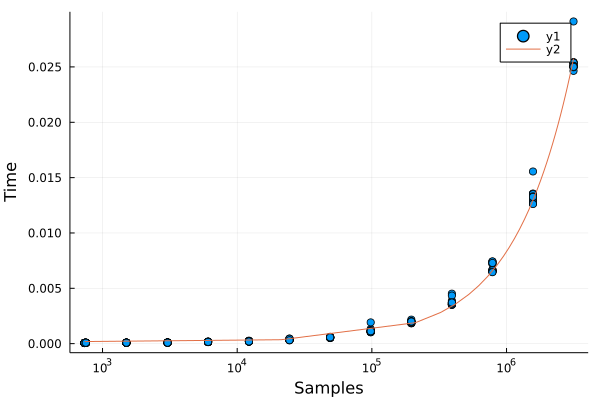

In [109]:
scatter(df.Samples, df.Time, xaxis=:log)
plot!(x -> a + b*x)
xlabel!("Samples")
ylabel!("Time")

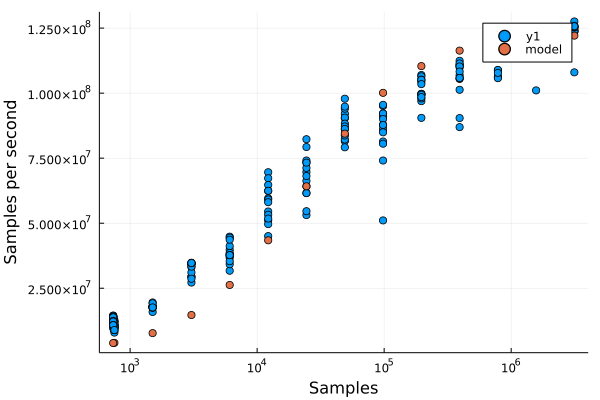

In [165]:
scatter(df.Samples, df.Samples ./ df.Time , xaxis=:log)

s = collect(Set(df.Samples))
scatter!(s, s ./ (a .+ b .* s) , label="model" )

xlabel!("Samples")
ylabel!("Samples per second")

In [166]:
df2 = DataFrame(Samples= log.(df.Samples), Sps=df.Samples ./ df.Time, Time=df.Time);

In [167]:
linearRegressor = lm(@formula(Sps ~ Samples), df2)
a2,b2=coef(linearRegressor)

2-element Vector{Float64}:
 -8.28968018748407e7
  1.450373622541022e7

In [168]:
e = stderror(linearRegressor)

2-element Vector{Float64}:
      1.64627073360856e6
 162733.93479110234

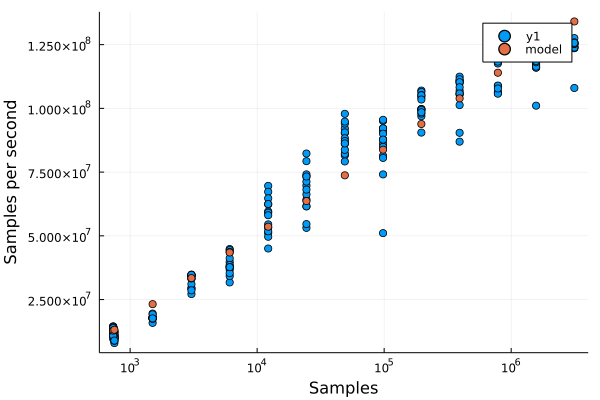

In [169]:
scatter(df.Samples, df.Samples ./ df.Time , xaxis=:log)

s = sort(collect(Set(df.Samples)))
scatter!(s, (a2 .+ b2 .* log.(s)) , label="model" )

#scatter!(s, (a2 - e[1] .+ (b2 - e[2]) .* log.(s)) , label="model" )
#scatter!(s, (a2 + e[1] .+ (b2 + e[2]) .* log.(s)) , label="model" )

xlabel!("Samples")
ylabel!("Samples per second")

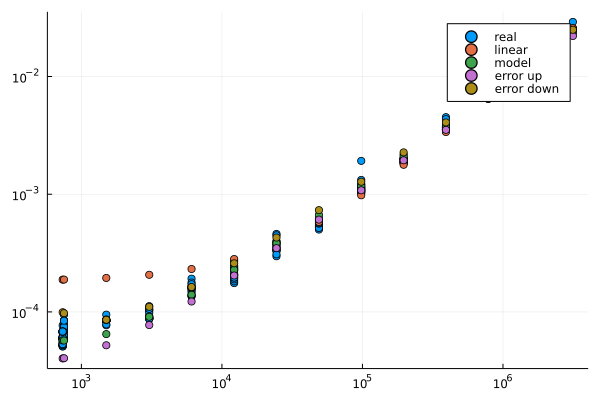

In [174]:
scatter(df.Samples, df.Time, label="real")
scatter!(s, a .+ b .* s, label="linear")
scatter!(s, s ./ (a2 .+ b2 .* log.(s)), label="model")
scatter!(s, s ./ ((a2 + 2e[1]) .+ (b2 + 2e[2]) .* log.(s)), label="error up")
scatter!(s, s ./ ((a2 - 2e[1]) .+ (b2 - 2e[2]) .* log.(s)), label="error down")
plot!(yaxis = :log, xaxis = :log)

# Samples w.r.t. Time

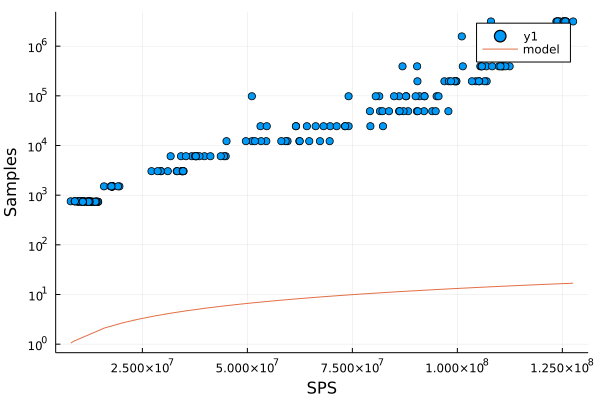

In [163]:
linearRegressor = lm(@formula(Samples ~ Sps), df2)
a2,b2=coef(linearRegressor)

scatter(df.Samples ./ df.Time, df.Samples, yaxis=:log)
xlabel!("SPS")
ylabel!("Samples")
s = sort(collect(Set(df.Samples)))
plot!( x -> (a2 .+ b2 .* (x)) , label="model" )

In [176]:
a = -75271377.247184053 
b = 13102708.855864525
time = 0.016
exp(-a / b) / (b* time)

0.0014907972389796079

# More

In [43]:
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df,.75)

fm = @formula(Time ~ Samples)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Time ~ 1 + Samples

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                   Coef.   Std. Error       t  Pr(>|t|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)  0.000173304  3.14451e-5     5.51    <1e-06  0.000111279  0.000235328
Samples      8.19675e-9   3.73384e-11  219.53    <1e-99  8.1231e-9    8.2704e-9
─────────────────────────────────────────────────────────────────────────────────

In [44]:
r2(linearRegressor)

0.9960523136929883

In [45]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(y_actual = test[!,:Time], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(y_actual = train[!,:Time], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

In [47]:
# MAPE function defination
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

# RMSE function defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

# Test Error
println("Mean Absolute test error: ",mean(abs.(performance_testdf.error)), "\n")
println("Mean Aboslute Percentage test error: ",mape(performance_testdf), "\n")
println("Root mean square test error: ",rmse(performance_testdf), "\n")
println("Mean square test error: ",mean(performance_testdf.error_sq), "\n")

# Train  Error
println("Mean train error: ",mean(abs.(performance_traindf.error)), "\n")
println("Mean Absolute Percentage train error: ",mape(performance_traindf), "\n")
println("Root mean square train error: ",rmse(performance_traindf), "\n")
println("Mean square train error: ",mean(performance_traindf.error_sq), "\n")

Mean Absolute test error: 0.00020222991301993622

Mean Aboslute Percentage test error: 0.6987500908688472

Root mean square test error: 0.0003330881340225755

Mean square test error: 1.109477050266412e-7

Mean train error: 0.0002028924452729351

Mean Absolute Percentage train error: 0.8365708123184625

Root mean square train error: 0.00039653559961132473

Mean square train error: 1.5724048175911283e-7



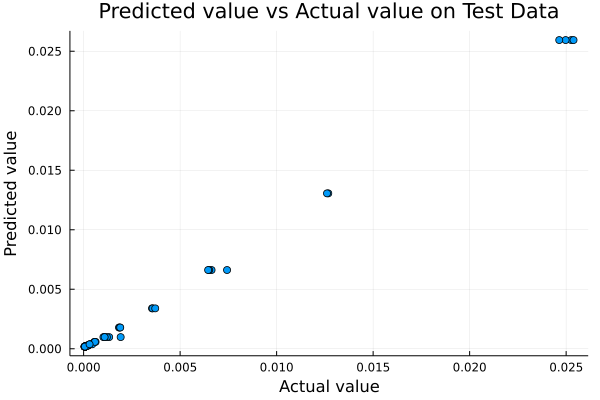

In [48]:
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Predicted value vs Actual value on Test Data", ylabel = "Predicted value", xlabel = "Actual value", legend = false)